In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
df=pd.read_csv('int.csv')
df.head(10) 

,year/country,ISO Code,Year,Urban_Population,Tax%
0,Afghanistan2003,AFG,2003,22.353,0.165953
1,Afghanistan2004,AFG,2004,22.500,0.411647
2,Afghanistan2005,AFG,2005,22.703,0.320864
3,Afghanistan2006,AFG,2006,22.907,1.261181
4,Afghanistan2007,AFG,2007,23.113,1.323461
5,Afghanistan2008,AFG,2008,23.320,1.664719
6,Afghanistan2009,AFG,2009,23.528,2.608631
7,Afghanistan2010,AFG,2010,23.737,2.563413
8,Afghanistan2011,AFG,2011,23.948,2.573097
9,Afghanistan2012,AFG,2012,24.160,2.477800


In [3]:
df.describe()

,Year,Urban_Population,Tax%
count,4827.000000,4827.000000,4827.000000
mean,2000.820178,54.389856,6.541745
std,9.820962,24.246521,4.916074
min,1980.000000,0.130000,0.000000
25%,1994.000000,33.818000,2.913485
50%,2001.000000,54.937000,5.453483
75%,2009.000000,74.264500,8.963828
max,2017.000000,100.000000,32.075305


In [4]:
df.dtypes

year/country         object
ISO Code             object
Year                  int64
Urban_Population    float64
Tax%                float64
dtype: object

In [5]:
missing_data=df.isnull()
missing_data.head(5)
# df.columns 
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print("")
# There are no null data in my dataset. I am clear to Fly, Maverick, out! 

year/country
False    4827
Name: year/country, dtype: int64

ISO Code
False    4827
Name: ISO Code, dtype: int64

Year
False    4827
Name: Year, dtype: int64

Urban_Population
False    4827
Name: Urban_Population, dtype: int64

Tax%
False    4827
Name: Tax%, dtype: int64



In [6]:
# #df['Urban_Population']=df['Urban_Population'].max
# df['Tax%']
# result = sm.ols(formula="Tax%' ~ 'Urban_Population", data=df).fit()

In [7]:
y=df['Tax%']
x=df['Urban_Population']
adjustedx=sm.add_constant(x)
model = sm.OLS(y,adjustedx)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tax%   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          5.50e-221
Time:                        19:13:04   Log-Likelihood:                -14032.
No. Observations:                4827   AIC:                         2.807e+04
Df Residuals:                    4825   BIC:                         2.808e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7554      0.157  

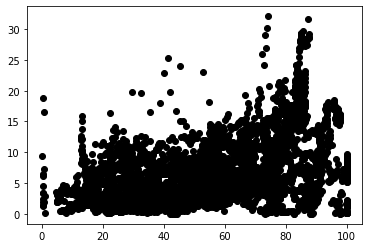

In [8]:
plt.plot(x,y,'o',color='black')

In [9]:
results.fittedvalues

0       3.722505
1       3.735441
2       3.753305
3       3.771257
4       3.789385
          ...   
4822    4.478160
4823    4.512920
4824    4.547856
4825    4.583056
4826    4.618432
Length: 4827, dtype: float64

In [12]:
# name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
jb = stats.jarque_bera(results.resid)
jb

Jarque_beraResult(statistic=2225.8541601175166, pvalue=0.0)

In [22]:
residuals = y-results.predict()
residuals

0      -3.556552
1      -3.323794
2      -3.432441
3      -2.510076
4      -2.465924
          ...   
4822    7.913840
4823    6.400425
4824    6.158313
4825    5.786103
4826    8.097043
Name: Tax%, Length: 4827, dtype: float64

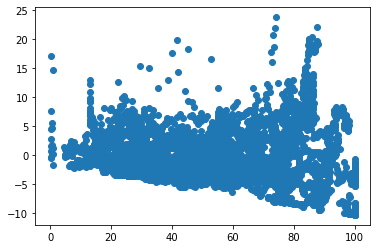

In [24]:
plt.scatter(x,residuals)